# <img src="Titanic.jpg"> Titanic Data Competition 
#### RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died:
#### Titanic's passengers numbered approximately 1,317 people: 324 in First Class, 284 in Second Class, and 709 in Third Class. Of these, 869 (66%) were male and 447 (34%) female. There were 107 children aboard, the largest number of whom were in Third Class.

### Importing Libraries 

### Data analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re


### Machine Learning

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score as f1

### Finding Current Working Directory

In [3]:
workingdirectory = os.getcwd()
Directory = os.listdir(workingdirectory)

print(Directory)
#df = pd.read_csv('./Titantic test data.xlxc')

['.ipynb_checkpoints', 'Books_small.json', 'Books_small_10000.json', 'Classifying text.py', 'ML Tutorial.py', 'Titanic Data Competition.ipynb', 'Titanic test data.csv', 'Titanic train data.csv', 'Titanic.jpg', 'untitled.py']


### Loading Data and Ajusting Display

In [4]:
train_df = pd.read_csv('Titanic train data.csv', delimiter= ',', encoding="utf-8-sig")
test_df = pd.read_csv('Titanic test data.csv', delimiter= ',', encoding="utf-8-sig")
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

# print(train_df[0:10])

### Classes

In [5]:
class Survive:
    Dead = "Dead"
    Alive = "Alive"
class Data:
    def Combine_factors(self):
        return True
    
    def __init__(self, Sex, Age, Family, Fare, Embarked):
        self.Embarked = Embarked
        self.Sex = Sex
        self.Age = Age
        self.Family = Family
        self.Fare = Fare
        self.Survive = self.get_survival()
        self.Factors = self.Combine_factors
        
class Check:
    def get_survival(self):
        if self.Survived == 0:
            return Survive.Dead
        elif self.Survived == 1:
            return Survive.Alive  

### Preparing Data

##### Firstly looking at the conection state between gender and Survuval

Sex       female  male
Embarked              
C              1     1
Q              3     3
S              2     2


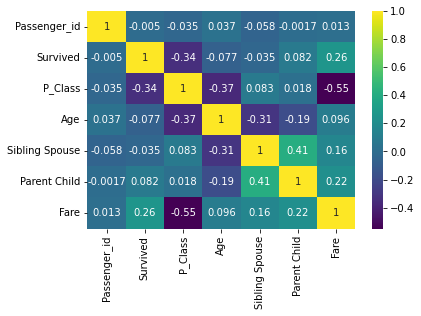

   Passenger_id  Survived  P_Class                                               Name     Sex   Age  Sibling Spouse  Parent Child            Ticket     Fare Cabin Embarked
0             1         0        3                            Braund, Mr. Owen Harris    male  22.0               1             0         A/5 21171   7.2500   NaN        S
1             2         1        1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0               1             0          PC 17599  71.2833   C85        C
2             3         1        3                             Heikkinen, Miss. Laina  female  26.0               0             0  STON/O2. 3101282   7.9250   NaN        S
3             4         1        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0               1             0            113803  53.1000  C123        S
4             5         0        3                           Allen, Mr. William Henry    male  35.0               0             0           

In [6]:
table = train_df.pivot_table(index='Embarked', columns='Sex', values='P_Class', 
                             aggfunc=lambda x: np.percentile(x, 25))
print(table)


#g1 = sns.FacetGrid(train_df, row='Sex', col='Embarked')
#g1.map(sns.histplot, "P_Class", color = 'r') 
#plt.show()

#sns.heatmap(train_df[['Sex'] + ['P_Class'] + ['Embarked'] 
                     #+ ['Age'] + ['Survived']].corr(), annot = True, cmap = 'viridis')
#plt.show()

sns.heatmap(train_df.corr(), annot = True, cmap = 'viridis')
plt.show()

print(train_df[0:5])

##### The graphs show that there is a slight correlation between age and survived that, couldd be explored further
##### Also as the coloumns containg string have not shown up in the graphs they need to be vectorized
### Next looking at the different age groups present on the titanic

In [7]:
train_df.describe()

#train_df. sort_values(['Fare'], ascending=False)
#train_df.loc[train_df['Name'].str.contains('emily', flags = re.I, regex = True)]

# new_df = train_df.loc[(train_df['Fare'] <= 50)
                     # & (train_df['P_Class'].isin(['1','2']))
                     # & (train_df['Survived'] ==1)
#]
bins = [0, 12, 18, 65, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(train_df['Age'], bins, labels=labels)

train_df['Age Group'] = age_groups

test_df['Age Group'] = pd.cut(test_df['Age'], bins, labels=labels)

## seeing if different ageroups traveled alone
#groups = train_df.groupby(['Age Group', 'Family'])
#ngroup =groups.size()
## getting the percentages of passangers that traveled alone
#lone = ( ngroup / len(train_df))

#print(lone)

## checking the columns present in DataFrame
#print(train_df.columns.tolist())

train_df['Family'] = train_df[ 'Sibling Spouse'] + train_df[ 'Parent Child']

test_df['Family'] = test_df[ 'Sibling Spouse'] + test_df[ 'Parent Child']

## Creating column which tells you if passangers traveled alone

for n in train_df:
    train_df['Alone'] = 0
    train_df.loc[train_df['Family'] == 0, 'Alone'] = 1

for n in test_df:
    test_df['Alone'] = 0
    test_df.loc[test_df['Family'] == 0, 'Alone'] = 1


cols = list(train_df.columns.values)
train_df = train_df[[cols[0]] + cols[2:12]+ cols[12:15] + [cols[1]]] ## changing the postion of Survived to the far right og the table using 'indexing' to reorder.

col = list(test_df.columns.values)
test_df = test_df[[cols[0]] + col[2:12]+ col[12:14]]

## As the sibling spouse & parent child columns all indicate that family is present on the titanic, the data types have been combined to give one class 'Family'

train_df.drop([ 'Sibling Spouse', 'Parent Child', 'Cabin' ], axis=1, inplace=True)

test_df.drop([ 'Sibling Spouse', 'Parent Child', 'Cabin' ], axis=1, inplace=True)

print(train_df[0:5])


   Passenger_id  P_Class                                               Name     Sex   Age            Ticket     Fare Embarked Age Group  Family  Alone  Survived
0             1        3                            Braund, Mr. Owen Harris    male  22.0         A/5 21171   7.2500        S     adult       1      0         0
1             2        1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0          PC 17599  71.2833        C     adult       1      0         1
2             3        3                             Heikkinen, Miss. Laina  female  26.0  STON/O2. 3101282   7.9250        S     adult       0      1         1
3             4        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0            113803  53.1000        S     adult       1      0         1
4             5        3                           Allen, Mr. William Henry    male  35.0            373450   8.0500        S     adult       0      1         0


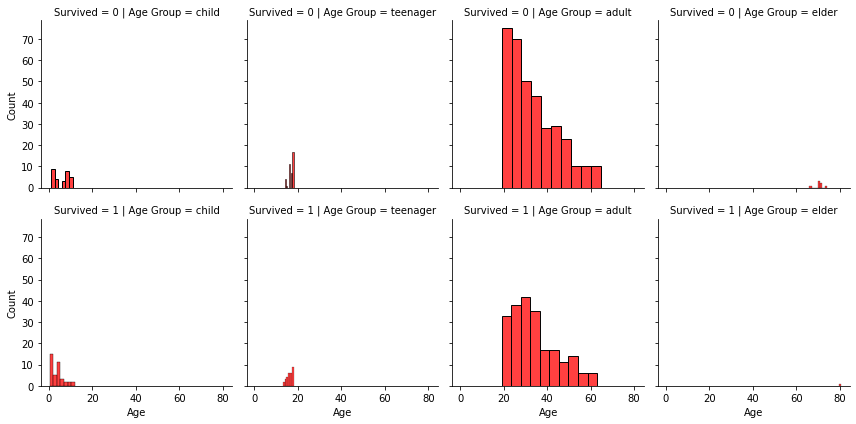

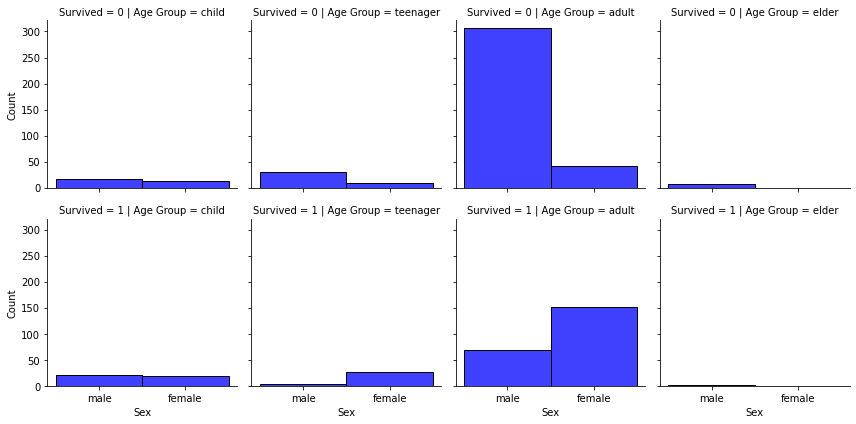

In [8]:

train_df.pivot_table(index='Sex', columns='Age Group', values='Survived', aggfunc=np.mean)


g2 = sns.FacetGrid(train_df, row='Survived', col='Age Group')
g2.map(sns.histplot, "Age", color = 'r')
plt.show()

g3 = sns.FacetGrid(train_df, row='Survived', col='Age Group')
g3.map(sns.histplot,"Sex", color = 'b')
plt.show()


In [9]:
print(train_df.dtypes)
#print(train_df.info())
#print(train_df.columns.tolist())
train_df.loc[train_df['Sex'] == 'male', 'Sex'] = '0'
train_df.loc[train_df['Sex'] == 'female', 'Sex'] = '1'

test_df.loc[test_df['Sex'] == 'male', 'Sex'] = '0'
test_df.loc[test_df['Sex'] == 'female', 'Sex'] = '1'

train_df.loc[train_df['Embarked'] == 'S', 'Embarked'] = '1'
train_df.loc[train_df['Embarked'] == 'C', 'Embarked'] = '2'
train_df.loc[train_df['Embarked'] == 'Q', 'Embarked'] = '3'

test_df.loc[test_df['Embarked'] == 'S', 'Embarked'] = '1'
test_df.loc[test_df['Embarked'] == 'C', 'Embarked'] = '2'
test_df.loc[test_df['Embarked'] == 'Q', 'Embarked'] = '3'

#print(train_df[0:100])


Passenger_id       int64
P_Class            int64
Name              object
Sex               object
Age              float64
Ticket            object
Fare             float64
Embarked          object
Age Group       category
Family             int64
Alone              int64
Survived           int64
dtype: object


In [10]:
train_df['Sex'] = pd.to_numeric(train_df['Sex'], errors='coerce').fillna(0).astype('int')

test_df['Sex'] = pd.to_numeric(test_df['Sex'], errors='coerce').fillna(0).astype('int')
test_df['Embarked'] = pd.to_numeric(test_df['Embarked'], errors='coerce').fillna(0).astype('int')



train_df['Ticket'] = train_df['Ticket'].str.extract('(\d+)')
train_df['Ticket'] = pd.to_numeric(train_df['Ticket'], errors='coerce').fillna(0).astype('int')

test_df['Ticket'] = test_df['Ticket'].str.extract('(\d+)')
test_df['Ticket'] = pd.to_numeric(test_df['Ticket'], errors='coerce').fillna(0).astype('int')



train_df['Age Group'] = train_df['Age Group'].replace(['NaN', 'child','teenager','adult','elder'], ['0', '1', '2', '3', '4'])
train_df['Age Group'] = pd.to_numeric(train_df['Age Group'], errors='coerce').fillna(0).astype('int')

test_df['Age Group'] = test_df['Age Group'].replace(['NaN', 'child','teenager','adult','elder'], ['0', '1', '2', '3', '4'])
test_df['Age Group'] = pd.to_numeric(test_df['Age Group'], errors='coerce').fillna(0).astype('int')


   Passenger_id  P_Class                                               Name  Sex  Age  Ticket  Fare  Embarked  Age Group  Family  Alone  Survived
0             1        3                            Braund, Mr. Owen Harris    0   22       5     7         1          3       1      0         0
1             2        1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38   17599    71         2          3       1      0         1
2             3        3                             Heikkinen, Miss. Laina    1   26       2     7         1          3       0      1         1
3             4        1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35  113803    53         1          3       1      0         1
4             5        3                           Allen, Mr. William Henry    0   35  373450     8         1          3       0      1         0 
    Passenger_id                                          Name  Sex  Age   Ticket  Fare  Embarked  Survived  Age Group  Fam

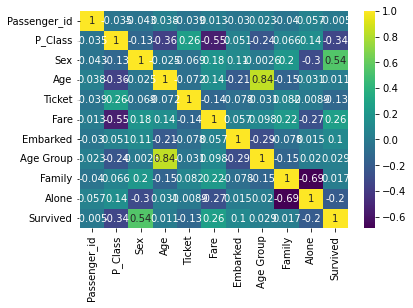

Passenger_id   -0.005007
P_Class        -0.338481
Sex             0.543351
Age             0.010508
Ticket         -0.128940
Fare            0.257482
Embarked        0.101849
Age Group       0.029251
Family          0.016639
Alone          -0.203367
Survived        1.000000
Name: Survived, dtype: float64


In [11]:
train_df['Embarked'] = train_df['Embarked'].fillna(0).astype('int32')
test_df['Embarked'] = test_df['Embarked'].fillna(0).astype('int32')

train_df['Age'] = train_df['Age'].fillna(0).astype('int32')
test_df['Age'] = test_df['Age'].fillna(0).astype('int32')

train_df['Fare'] = train_df['Fare'].fillna(0).astype('int32')
test_df['Fare'] = test_df['Fare'].fillna(0).astype('int32')

print(train_df[0:5],"\n" , test_df[0:5])


sns.heatmap(train_df.corr(), annot = True, cmap = 'viridis')
plt.show()

correlation = train_df.corr()
print(correlation['Survived'])

### Machine Learning Model

In [12]:
x_train = train_df.drop(['Survived','Name','P_Class','Alone'], axis=1)
y_train = train_df['Survived']
x_test  = test_df.drop(['Name','Survived'], axis=1).copy()
y_test  = test_df.drop(test_df.columns.difference(['Survived']), axis = 1).copy()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((891, 8), (891,), (418, 8), (418, 1))

#### Linear SVC


In [13]:
clf_lsvm = LinearSVC()
clf_lsvm.fit(x_train, y_train)

lsvm_y_pred = clf_lsvm.predict(x_test)

C:\Users\Yusuf\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### SVC

In [14]:
clf_svm = SVC()
clf_svm.fit(x_train, y_train)

svm_y_pred = clf_svm.predict(x_test)

#### Logistic Regression

In [15]:
clf_lreg = LogisticRegression()
clf_lreg.fit(x_train, y_train)

lreg_y_pred = clf_lreg.predict(x_test)

#### Gaussian Naive Bayes

In [16]:
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train)

gnb_y_pred = clf_gnb.predict(x_test)

#### Nearest Neighbour

In [17]:
clf_nbrs = KNeighborsClassifier()
clf_nbrs.fit(x_train, y_train)

nbrs_y_pred = clf_nbrs.predict(x_test)

#### Decision Tree

In [18]:
clf_dec = DecisionTreeClassifier()
clf_dec.fit(x_train, y_train)

dec_y_pred = clf_dec.predict(x_test)

#### Random Forest

In [19]:
clf_rfc = RandomForestClassifier(n_estimators=100)
clf_rfc.fit(x_train, y_train)

rfc_y_pred = clf_rfc.predict(x_test)

### Evaluation Of Models

In [20]:
print('Support Vector(SVM):', (clf_svm.score(x_train, y_train)*100).astype(np.float16))
print('Linear SVM:', (clf_lsvm.score(x_train, y_train)*100).astype(np.float16))
print('Linear Regression:', (clf_lreg.score(x_train, y_train)*100).astype(np.float16))
print('Gaussian Naive Bayes:', (clf_gnb.score(x_train, y_train)*100).astype(np.float16))
print('K Nearest Neighbours:', (clf_nbrs.score(x_train, y_train)*100).astype(np.float16))
print('Decision Tree:', (clf_dec.score(x_train, y_train)*100).astype(np.float16))
print('RandomForest:', (clf_rfc.score(x_train, y_train)*100).astype(np.float16))

Support Vector(SVM): 61.62
Linear SVM: 42.75
Linear Regression: 65.2
Gaussian Naive Bayes: 66.44
K Nearest Neighbours: 76.44
Decision Tree: 100.0
RandomForest: 100.0


In [21]:
print('f1_Score for:')
print('Support Vector(SVM):', f1(y_test, svm_y_pred , average=None).astype(np.float16))
print('Linear SVM:', f1(y_test, lsvm_y_pred , average=None).astype(np.float16))
print('Linear Regression:', f1(y_test, lreg_y_pred , average=None).astype(np.float16))
print('Gaussian Naive Bayes:', f1(y_test, gnb_y_pred , average=None).astype(np.float16))
print('K Nearest Neighbours:', f1(y_test, nbrs_y_pred , average=None).astype(np.float16))
print('Decision Tree:', f1(y_test, dec_y_pred , average=None).astype(np.float16))
print('RandomForest:', f1(y_test, rfc_y_pred , average=None).astype(np.float16))

f1_Score for:
Support Vector(SVM): [0.778 0.   ]
Linear SVM: [0.6484 0.338 ]
Linear Regression: [0.7754 0.1879]
Gaussian Naive Bayes: [0.7656 0.2744]
K Nearest Neighbours: [0.7007 0.4307]
Decision Tree: [0.7925 0.724 ]
RandomForest: [0.8706 0.7725]
